In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow.keras.datasets import mnist

In [2]:
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [5]:
single_image = X_train[0]

In [6]:
single_image.shape

(28, 28)

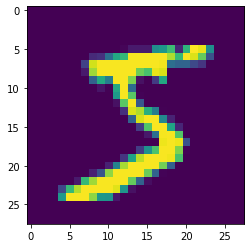

In [7]:
plt.imshow(single_image)

In [8]:
Y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [9]:
from tensorflow.keras.utils import to_categorical

In [10]:
Y_ex = to_categorical(Y_train)

In [11]:
Y_ex.shape

(60000, 10)

In [12]:
Y_ex[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [13]:
Y_cat_train = to_categorical(Y_train,num_classes=10)
Y_cat_test = to_categorical(Y_test,num_classes=10)

### For Scaling The Images from 0-1

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
X_train.min()

0.0

In [16]:
X_train.max()

1.0

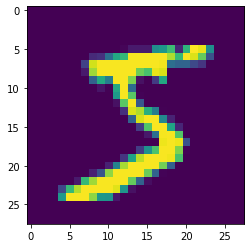

In [19]:
plt.imshow(X_train[0])

Therefore Scaling Doesn't Effect the actual Image

### Now lets Add one more dimension to let our CNN know that it is Single GrayScale images

In [20]:
X_train = X_train.reshape(60000,28,28,1) # batch_size,width,height,color_channels
X_test = X_test.reshape(10000,28,28,1)

# as these images are grayscale -> color_channel = 1
# if we have coloured images then -> color_channel = 3

## Creating and Training the Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [28]:
model = Sequential()

model.add(Conv2D(filters = 32,kernel_size=(4,4),strides=(1,1),padding='same',input_shape = (28,28,1),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Flatten())
model.add(Dense(128,activation='relu'))

# output layer
model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])

In [29]:
from tensorflow.keras.callbacks import EarlyStopping

In [30]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [32]:
model.fit(X_train,Y_cat_train,epochs=10,validation_data=(X_test,Y_cat_test),callbacks=[early_stop])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 27s 452us/sample - loss: 0.1322 - accuracy: 0.9599 - val_loss: 0.0583 - val_accuracy: 0.9813
Epoch 2/10
60000/60000 [==============================] - 31s 518us/sample - loss: 0.0460 - accuracy: 0.9862 - val_loss: 0.0428 - val_accuracy: 0.9855
Epoch 3/10
60000/60000 [==============================] - 24s 393us/sample - loss: 0.0289 - accuracy: 0.9905 - val_loss: 0.0411 - val_accuracy: 0.9869
Epoch 4/10
60000/60000 [==============================] - 24s 401us/sample - loss: 0.0194 - accuracy: 0.9941 - val_loss: 0.0415 - val_accuracy: 0.9872


In [33]:
metrices = pd.DataFrame(model.history.history)

In [34]:
metrices

,loss,accuracy,val_loss,val_accuracy
0,0.132245,0.959850,0.058262,0.9813
1,0.046012,0.986167,0.042754,0.9855
2,0.028933,0.990533,0.041054,0.9869
3,0.019389,0.994117,0.041513,0.9872


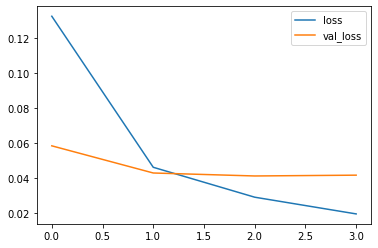

In [35]:
metrices[['loss','val_loss']].plot()

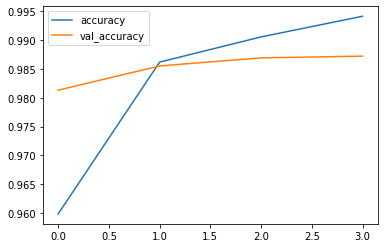

In [36]:
metrices[['accuracy','val_accuracy']].plot()

In [37]:
model.evaluate(X_test,Y_cat_test)

10000/10000 [==============================] - 1s 107us/sample - loss: 0.0415 - accuracy: 0.9872


[0.04151268278002681, 0.9872]

## Now Lets Evaluate Our Model

In [38]:
from sklearn.metrics import classification_report,confusion_matrix

In [39]:
predictions = model.predict_classes(X_test)

In [40]:
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       1.00      0.98      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       0.99      0.99      0.99       958
           7       0.97      1.00      0.99      1028
           8       0.99      0.98      0.98       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [41]:
print(confusion_matrix(Y_test,predictions))

[[ 973    1    0    1    0    2    3    0    0    0]
 [   0 1132    0    1    0    0    2    0    0    0]
 [   3    3 1007    1    1    0    1   12    3    1]
 [   0    0    1  995    0    9    0    4    1    0]
 [   0    1    1    0  975    0    3    0    0    2]
 [   1    0    1    3    0  886    1    0    0    0]
 [   3    2    0    0    1    2  947    0    3    0]
 [   0    0    0    0    0    0    0 1027    1    0]
 [   7    2    1    1    0    1    0    6  952    4]
 [   1    4    0    2    9    8    0    6    1  978]]


In [43]:
import seaborn as sns

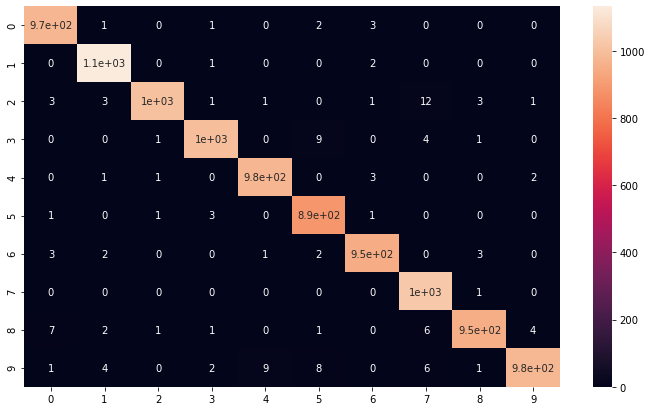

In [45]:
plt.figure(figsize=(12,7))
sns.heatmap(confusion_matrix(Y_test,predictions),annot=True)

## Now lets Check our Prediction

In [46]:
number = X_test[0]

In [48]:
number.shape

(28, 28, 1)

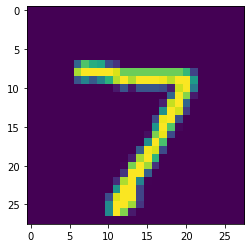

In [49]:
plt.imshow(number.reshape(28,28))

In [50]:
model.predict_classes(number.reshape(1,28,28,1)) #  batch_size,width,height,color_channels

array([7], dtype=int64)